In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


config_disorder = 0
config_disorder_sorted = 0

if config_disorder and config_disorder_sorted:
    base_dir = "../results_conf_dis_sort/"
elif config_disorder:
    base_dir = "../results_conf_dis/"
else:
    base_dir = "../results/"

print(base_dir[2:])

/Users/rafal.swietek/Projects/CODES/QHamSolver/QuantumSun/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


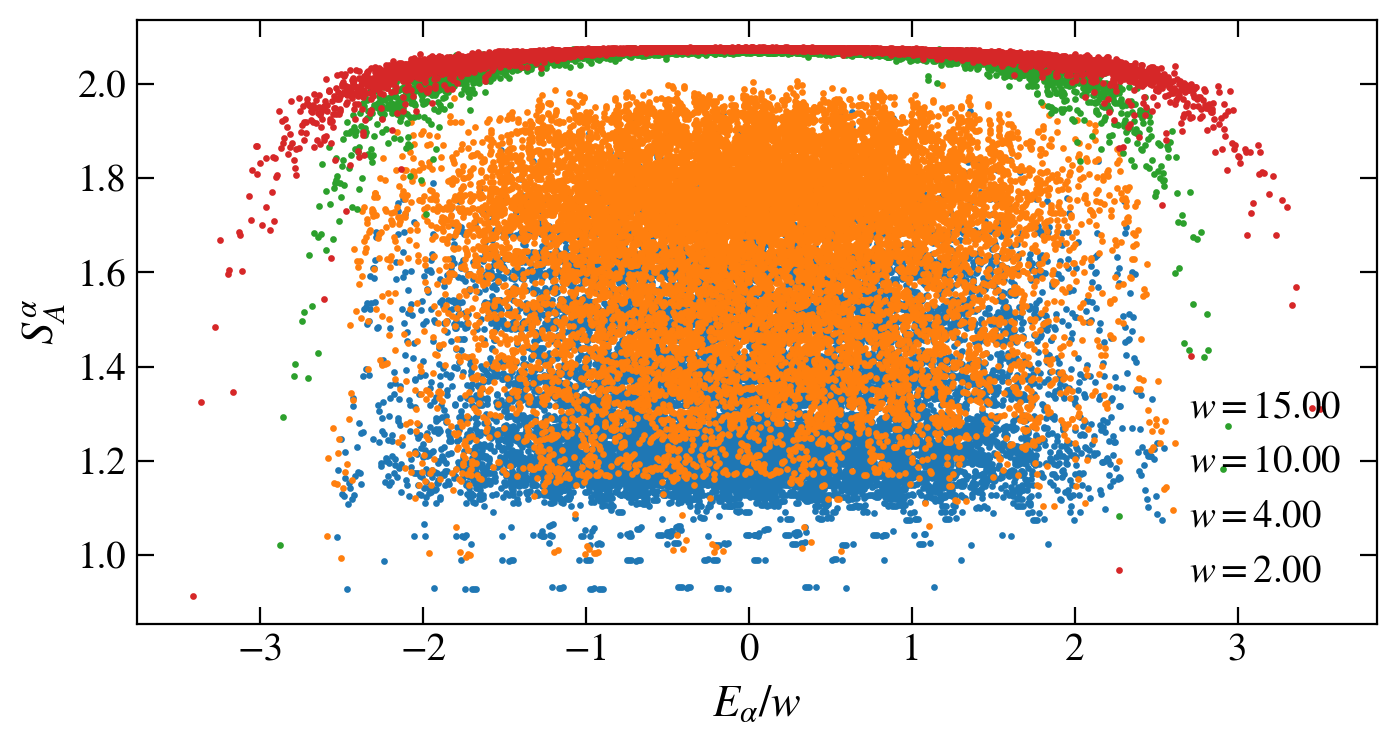

In [10]:

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(8,4), dpi = 200)

L_total=14
N=5

J=1.0
alfa=1.0
h=0.0
w=2.0
zeta=0.0
gamma=1.0
ini_ave=0
L = L_total - N
LA = L_total - 3

for w in [15, 10, 4, 2]:
    name = base_dir + 'Entropy/Eigenstate/realisation=0/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            energies = np.array(file.get('energies'))
            entropies = np.array(file.get('entropy'))[L_total - LA]
            axis.scatter(energies / w, entropies, s=2, label=r"$w=%.2f$"%w)
    else:
        print(name)


fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha/w$", font_size=14, set_legend=True)

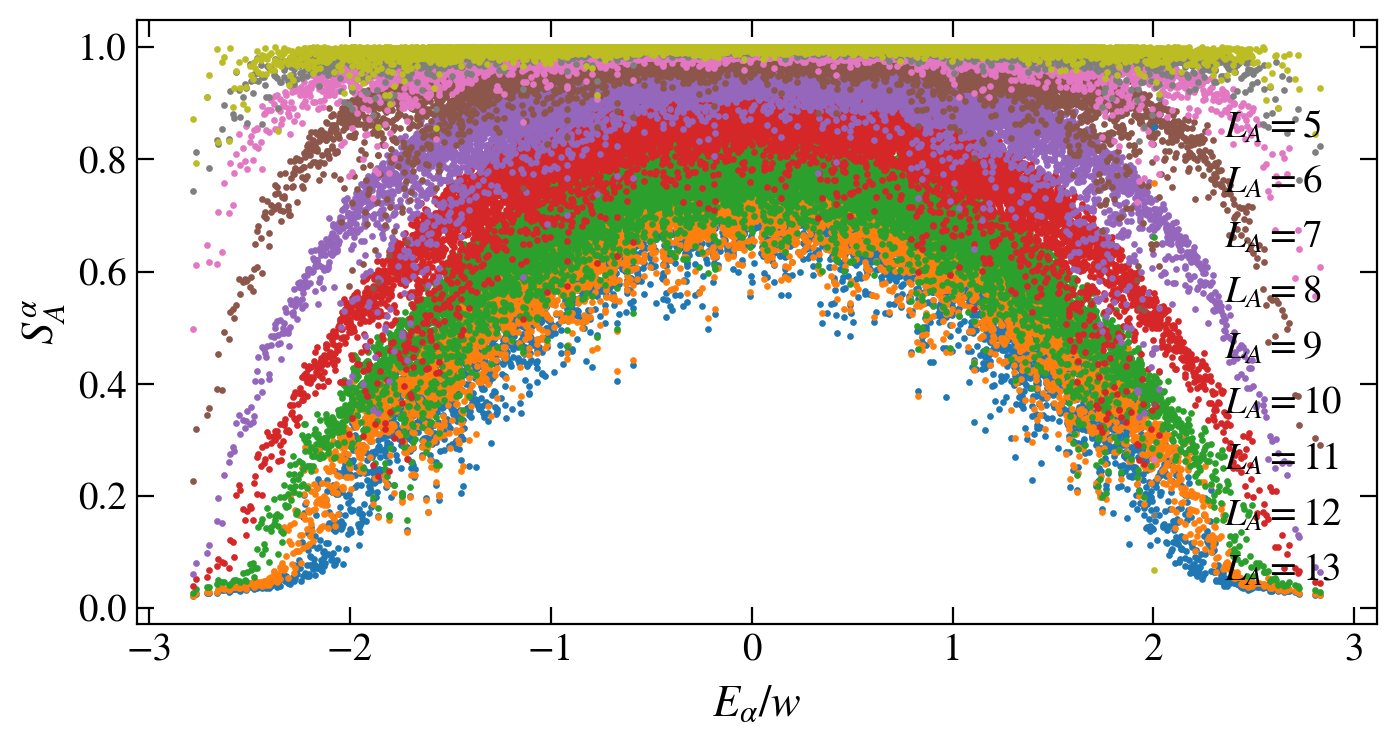

In [16]:

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(8,4), dpi = 200)

L_total=14
N=5

J=1.0
alfa=1.0
h=0.0
w=5.0
zeta=0.0
gamma=1.0
ini_ave=0
L = L_total - N
LA = L_total - 3

for LA in np.arange(N, L_total):
    name = base_dir + 'Entropy/Eigenstate/realisation=0/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            energies = np.array(file.get('energies'))
            entropies = np.array(file.get('entropy'))[L_total - LA] / page(LA, L_total - LA)
            axis.scatter(energies / w, entropies, s=2, label=r"$L_A=%g$"%LA)
    else:
        print(name)


fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha/w$", font_size=14, set_legend=True)